### PAIR PROGRAMMING - EDA 2

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable


En esta lección hemos aprendido qué son los valores nulos y los outliers o valores faltantes. Además hemos aprendido una librería super molona que nos permite hacer una exploración de nuestro dataset muy profunda.

Las hipótesis que os planteamos para el conjunto de datos de historico_tickets son:

1. Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.
   
         - La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?

2. Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.
   
        - La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?

3. Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.
   
        - La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?

4. Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.
   
        - La pregunta que contestaremos es: ¿Hay alguna diferencia entre a lo largo del tiempo entre las distintas categorías de solicitudes de tickets que tenemos?

#### OBJETIVOS

Usad la librería sidetable para:

1. Explorar los valores nulos.

In [3]:
df = pd.read_csv("../datos/historico_tickets_limpio_pandas.csv", index_col = 0)

In [36]:
df.stb.missing()

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


In [34]:
df.isnull().sum() * 100 / df.shape[0]

id_ticket          0.0
fecha              0.0
id_empleado        0.0
id_agente          0.0
categoría          0.0
tipo               0.0
severidad          0.0
prioridad          0.0
días_resolución    0.0
satisfacción       0.0
semestre           0.0
año                0.0
mes                0.0
dtype: float64

2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.

In [5]:
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


In [8]:
df.stb.freq(["categoría"])

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,Software,19543,20.067566,87669,90.022180
3,Hardware,9717,9.977820,97386,100.000000


In [7]:
df.stb.freq(["categoría"], thresh= 70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.


In [9]:
df.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


In [13]:
df.stb.freq(["categoría", "tipo"])

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,Sistema,Problema,9736,9.997330,75518,77.545027
4,Hardware,Solicitud,7356,7.553447,82874,85.098474
5,Acceso/Login,Problema,7226,7.419958,90100,92.518432
6,Software,Problema,4925,5.057195,95025,97.575627
7,Hardware,Problema,2361,2.424373,97386,100.000000


In [14]:
df.stb.freq(["categoría", "tipo"], thresh= 70)

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.


In [15]:
df.stb.freq(["tipo", "semestre"])

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,Solicitud,1 semestre,35675,36.632576,73138,75.101144
2,Problema,2º semestre,12413,12.746185,85551,87.847329
3,Problema,1 semestre,11835,12.152671,97386,100.000000


In [16]:
df.stb.freq(["tipo", "semestre"], thresh= 60)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.


In [18]:
df.stb.freq(["mes", "tipo"])

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,Abril,Solicitud,5992,6.152835,61826,63.485511


In [17]:
df.stb.freq(["mes", "tipo"], thresh= 60)

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:

        6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.
        6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.



In [20]:
numericas = df.select_dtypes(include = np.number)
numericas

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016
1,1566,10,0,5,2016
2,569,29,3,5,2016
3,320,40,9,5,2016
4,1842,31,0,5,2016
...,...,...,...,...,...
29083,1142,1,11,5,2020
29084,223,40,7,4,2020
29085,256,7,13,5,2020
29086,1060,9,9,5,2020


<function matplotlib.pyplot.show(close=None, block=None)>

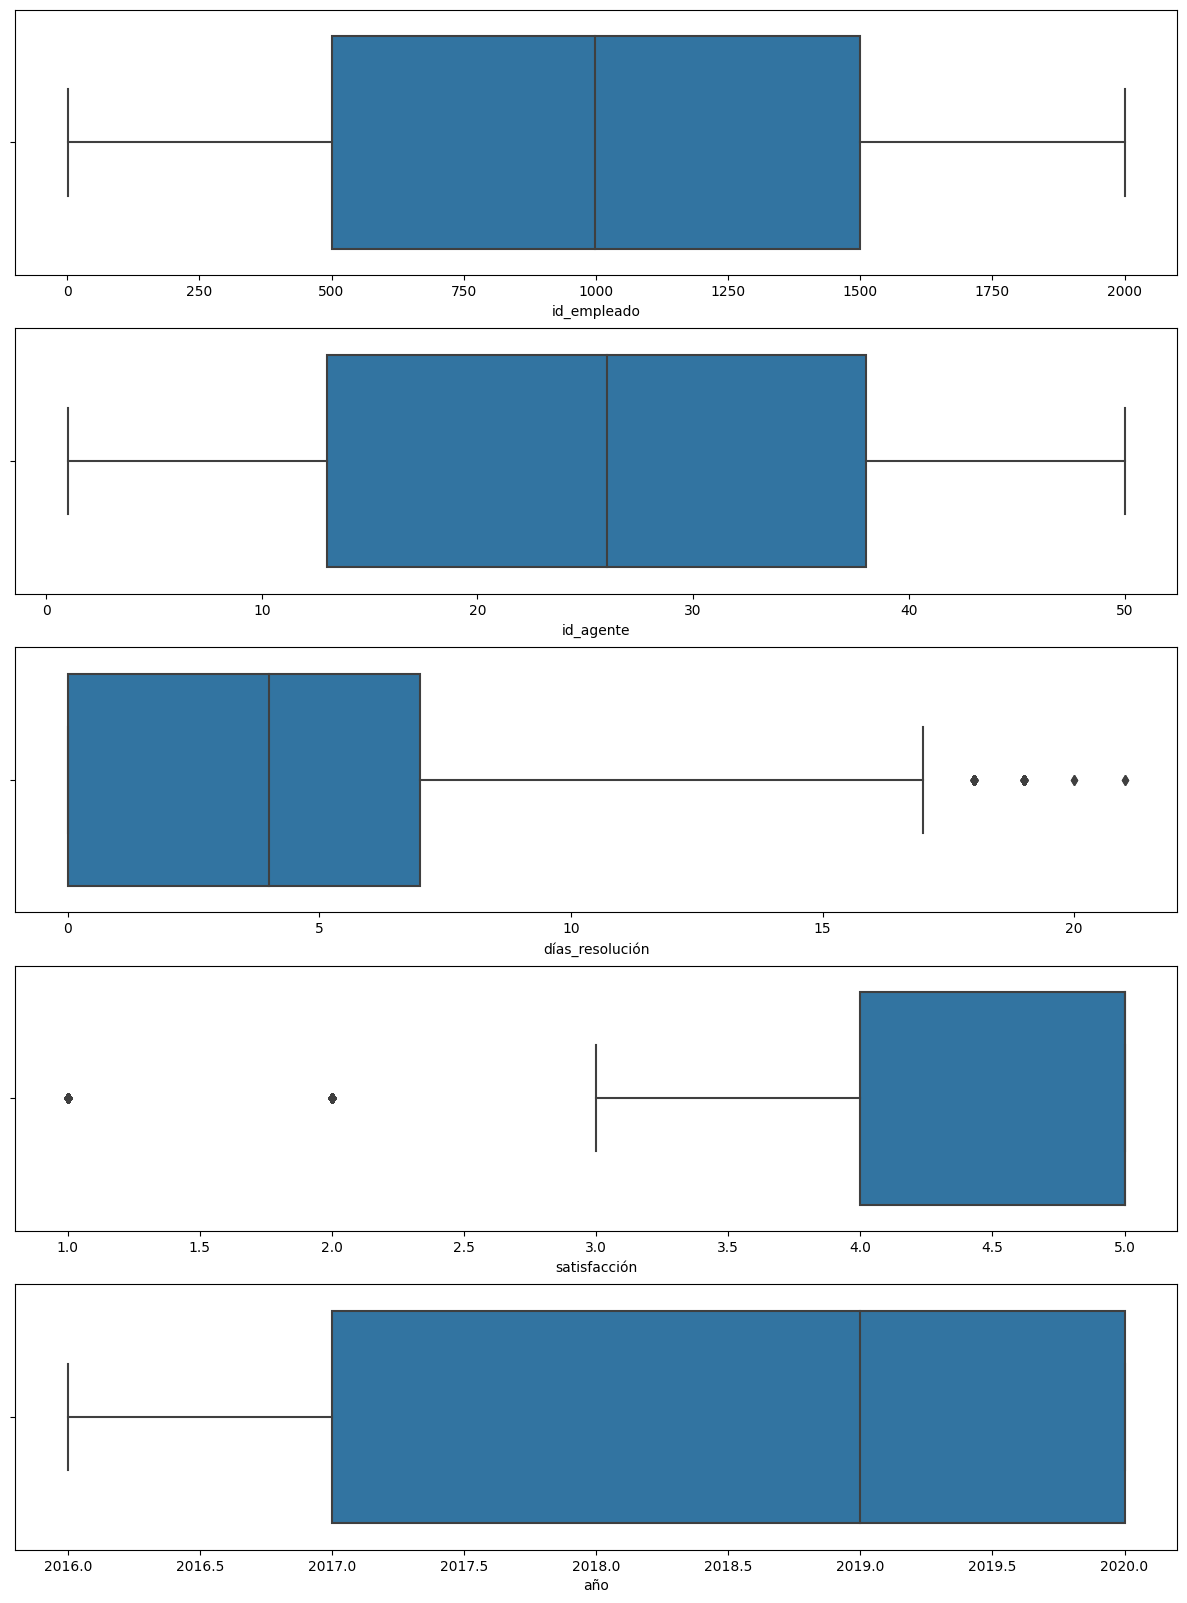

In [33]:
fig, axes= plt.subplots(5,1, figsize= (15, 20))

for i in range(len(numericas.columns)):
    sns.boxplot(x= numericas.columns[i], data = numericas, ax = axes[i])
    

plt.show

El boxplot que solo nos interesa es el de días de resolución, ya que los demás aunque sean de tipo numéricas, en realidad representan a categóricas.

In [38]:
df.head(1
        )

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


<AxesSubplot:xlabel='días_resolución'>

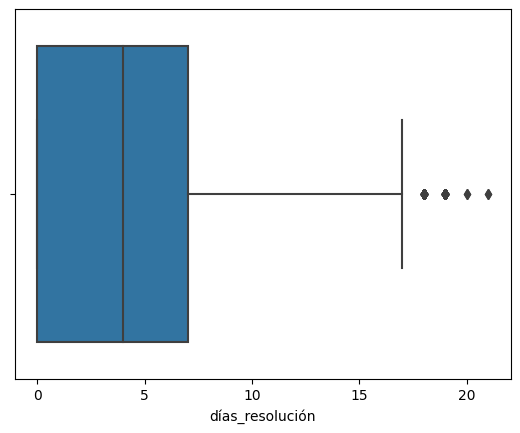

In [41]:
sns.boxplot(x = "días_resolución", data = df)

Como vemos, hay pocos outliers fuera del boxplot, que serán los datos que más nos interesen ya que son los clientes que tardan más días en solucionarle los problemas; y habrá que estudiar si los empleados que los atienden están sobrecargados de trabajo.

Vamos a ver otras opciones

In [42]:
df.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


In [45]:
df.stb.freq(["satisfacción","categoría"])

,satisfacción,categoría,count,percent,cumulative_count,cumulative_percent
0,5,Sistema,20242,20.785328,20242,20.785328
1,5,Acceso/Login,15143,15.549463,35385,36.334791
2,4,Sistema,11114,11.412318,46499,47.747109
3,5,Software,10236,10.510751,56735,58.257860
4,4,Acceso/Login,8243,8.464256,64978,66.722116
5,4,Software,5485,5.632226,70463,72.354343
6,5,Hardware,5101,5.237919,75564,77.592262
7,1,Sistema,3922,4.027273,79486,81.619535
8,1,Acceso/Login,2997,3.077444,82483,84.696979
9,3,Sistema,2883,2.960384,85366,87.657363


#### CONCLUSIONES

Si bien es cierto que la lección de hoy ha sido muy teórica, en esta parte los ejercicios no serán tanto de programar sino de pensar 🤔. ¿Qué tendréis que hacer?

En relación a los valores nulos:

- Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).


QUE NO HAY NULOS!!!!

  
- Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.